In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Key Concepts and Challenges:**
- Data Collection: Obtain a dataset containing customer information, purchase history, and relevant data.
- Data Exploration and Cleaning: Explore the dataset, understand its structure, and handleany missing or inconsistent data.
- Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of purchases, etc.
- Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segmentcustomers based on behavior and purchase     patterns.
- Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.
- Insights and Recommendations: Analyze characteristics of each segment and provide insights.

**Loading the Dataset**

In [30]:
df=pd.read_csv(r"C:\Users\hp\Downloads\jupyter\ifood_df.csv")

In [31]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [15]:
df.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


### Checking for the different Columns and their Types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

## Checking for the null Values

In [17]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

Hence we can see that there are no Null values

Checking for the unique values

In [18]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

Since from the given information we can see that Z_CostContact and Z_Revenue has same values for all the entries hence we can drop these columns from our dataset.

In [32]:
df=df.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [33]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

Hence the information for the columns Z_CostContact and Z_Revenue has been removed from our dataset

### Checking for the Outliers

Calculating the outliers for the Income Column

In [34]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print('The lower and upper bound for the income column is', lower_bound , 'and',upper_bound)

The lower and upper bound for the income column is -14431.5 and 117908.5


In [35]:
df[(df['Income']<lower_bound) | (df['Income']>upper_bound)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall


In the Income Column as we can see that there is No Outlier

In [36]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


Checking the Outliers for the MntRegularProds column

In [37]:
Q1 = df['MntRegularProds'].quantile(0.25)
Q3 = df['MntRegularProds'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print('The lower and upper bound for the MntRegularProds column is', lower_bound , 'and',upper_bound)

The lower and upper bound for the MntRegularProds column is -1221.0 and 2147.0


In [38]:
df[(df['MntRegularProds']<lower_bound) | (df['MntRegularProds']>upper_bound)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1433,93790.0,0,0,16,1302,68,731,89,114,45,...,0,0,0,0,1,0,0,2304,2259,3
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


As we can see that we got 4 Outliers in this column. Before removing them lets see the outliers for the MntTotal Columns

In [39]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print('The lower and upper bound for the MntTotal column is', lower_bound , 'and',upper_bound)

The lower and upper bound for the MntTotal column is -1306.0 and 2326.0


In [40]:
df[(df['MntTotal']<lower_bound) | (df['MntTotal']>upper_bound)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


All the Outliers that we got from the MntRegukarProds column are present in the outliers spotted for the MntTotal Column. Hence removing all these columns

In [41]:
df=df[(df['MntTotal']>lower_bound) | (df['MntTotal']<upper_bound)]

In [42]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


The Dataset So obtained now is free from all the Outliers.

In [43]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


### <font color='brown'> Descriptive Statistics </font>

In [44]:
mean_income=df['Income'].mean()
std_income=df['Income'].std()
median_income=df['Income'].median()
mode_income=df['Income'].mode()
print(mean_income,   std_income,    median_income,    mode_income)

51622.0947845805 20713.06382588019 51287.0 0    7500.0
Name: Income, dtype: float64


In [45]:
mean_mnttotal=df['MntTotal'].mean()
std_mnttotal=df['MntTotal'].std()
median_mnttotal=df['MntTotal'].median()
mode_mnttotal=df['MntTotal'].mode()
print(mean_mnttotal,   std_mnttotal,    median_mnttotal,    mode_mnttotal)

562.7646258503402 575.9369108204296 343.0 0    39
Name: MntTotal, dtype: int64


From this we can see that the average purchase for the products is 562.764 ruppees.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [47]:
mean_mntpro=df['MntRegularProds'].mean()
std_mntpro=df['MntRegularProds'].std()
median_mntpro=df['MntRegularProds'].median()
print(mean_mntpro,   std_mntpro,    median_mntpro)

518.7074829931972 553.8472480705676 288.0


Average Amount Spent on the Regular Products is 518.707 ruppees.

## <font color='Green'> Customer Segmentation</font>

Segragating the customers based on their marital status.

In [48]:
l=[]
for index, row in df.iterrows():
    if row['marital_Divorced']==1:
        l.append('Divorced')
    if row['marital_Married']==1:
        l.append('Married')
    if row['marital_Single']==1:
        l.append('Single')
    if row['marital_Together']==1:
        l.append('Together')
    if row['marital_Widow']==1:
        l.append('Widow')

In [49]:
df['Marital Status']=l

In [50]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital Status
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,Married


C:\Users\hp\AppData\Local\Temp\ipykernel_1184\3104629899.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Marital Status', y='Income', ci=None)


Text(0, 0.5, 'Income')

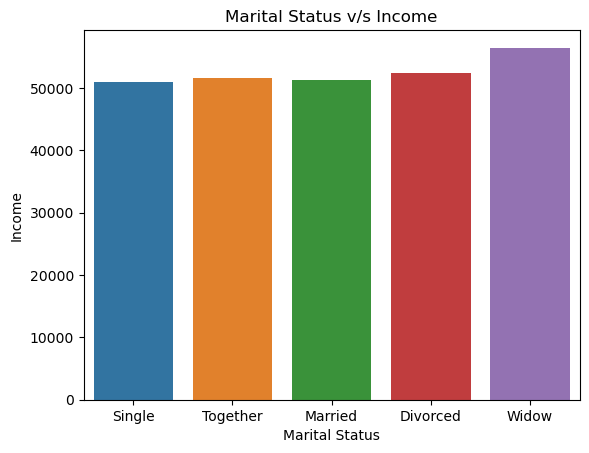

In [52]:
sns.barplot(data=df, x='Marital Status', y='Income', ci=None)
plt.title('Marital Status v/s Income')
plt.ylabel('Income')

From this Graph we can see that the Widow have Incom than other Status people.

C:\Users\hp\AppData\Local\Temp\ipykernel_1184\2934669495.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Marital Status', y='MntTotal', ci=None)


Text(0, 0.5, 'MntTotal')

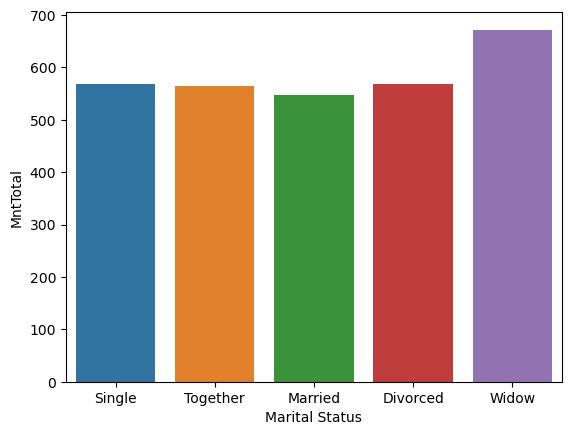

In [53]:
sns.barplot(data=df, x='Marital Status', y='MntTotal', ci=None)
plt.ylabel('MntTotal')

From this graph we can say that Widows have Spent more on purchasing the Total Products

Segragating the customers based on their Educational status.

In [54]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital Status
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,Married


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [57]:
l=[]
for index, row in df.iterrows():
    if row['education_2n Cycle']==1:
        l.append('Less Educated')
    if row['education_Basic']==1:
        l.append('Schooling')
    if row['education_Graduation']==1:
        l.append('Graduated')
    if row['education_Master']==1:
        l.append('Masters')
    if row['education_PhD']==1:
        l.append('PhD Scholars')

In [58]:
df['Education_Status']=l

In [59]:
df['Education_Status']

0          Graduated
1          Graduated
2          Graduated
3          Graduated
4       PhD Scholars
            ...     
2200       Graduated
2201    PhD Scholars
2202       Graduated
2203         Masters
2204    PhD Scholars
Name: Education_Status, Length: 2205, dtype: object

C:\Users\hp\AppData\Local\Temp\ipykernel_1184\388593267.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Education_Status', y='Income', ci=None)


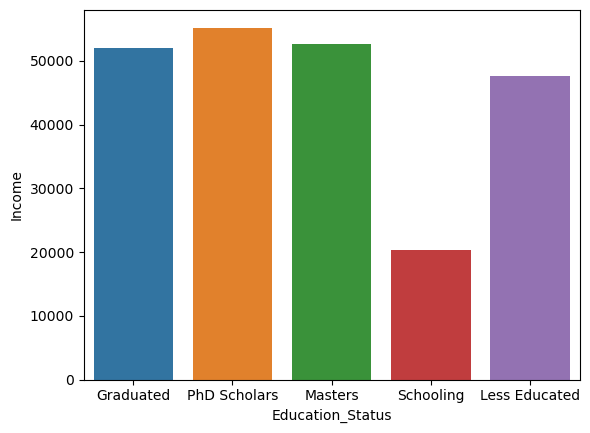

In [60]:
sns.barplot(data=df, x='Education_Status', y='Income', ci=None)
plt.show()

From this we can say that PhD scholars have got most income.

C:\Users\hp\AppData\Local\Temp\ipykernel_1184\781838178.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Education_Status', y='MntTotal', ci=None)


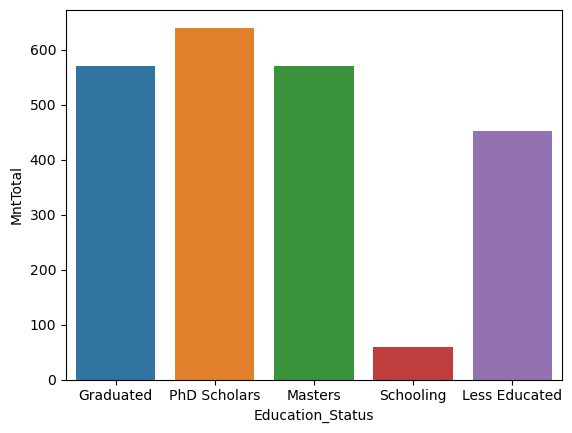

In [61]:
sns.barplot(data=df, x='Education_Status', y='MntTotal', ci=None)
plt.show()

Same the purchase of the total products is doen again by the PhD scholars only.

In [62]:
l=[]
for index, row in df.iterrows():
    if row['Marital Status']=='Married' or row['Marital Status']=='Together':
        l.append(1)
    else:
        l.append(0)

In [63]:
df['Relationship']=l

In [64]:
l=[]
for index, row in df.iterrows():
    if row['Education_Status']=='Less Educated':
        l.append(0)
    elif row['Education_Status']=='Schooling':
        l.append(1)
    elif row['Education_Status']=='Graduated':
        l.append(2)
    elif row['Education_Status']=='Masters':
        l.append(3)
    else:
        l.append(4)

In [65]:
df['Education']=l

The people less educated are 0 then with schooling are categorized to 1 the  with graduation in hand are categorized to 2 and so on.

## Clustering 

In [85]:
from sklearn.cluster import KMeans

In [84]:
from sklearn.preprocessing import StandardScaler

With the help of StandardScalar we can normalise our dataset which helps the mathematical based algorithms interpret features with different magnitudes and distributions equally an also Standardisation causes the values to follow the **Normal Disribution Graph which means that their mean = 0 and standard deviation = 1.**

In [69]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital Status,Education_Status,Relationship,Education
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,Single,Graduated,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,Single,Graduated,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,Together,Graduated,1,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,Together,Graduated,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,Married,PhD Scholars,1,4


In [73]:
df1.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'Relationship', 'Education'],
      dtype='object')

In [70]:
df1=df.copy()

In [71]:
df1.drop(['Marital Status', 'Education_Status'], axis=1, inplace =True)

<Axes: >

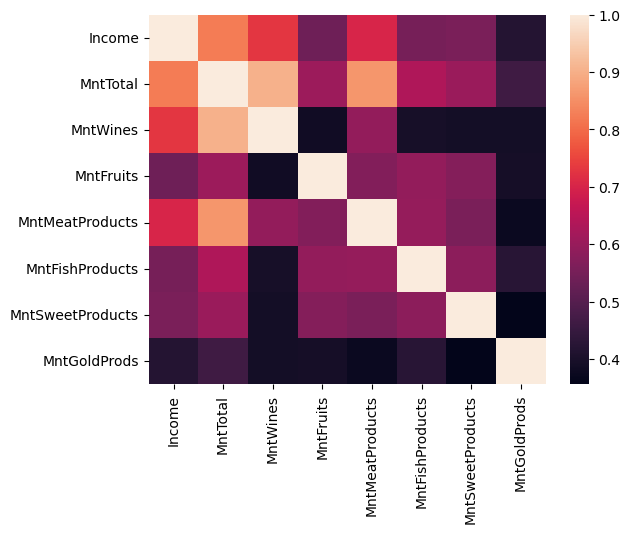

In [81]:
sns.heatmap(df1[['Income','MntTotal', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].corr())

In [86]:
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'Relationship','Education']
df_scaled = df.copy()
df_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])

In [87]:
df_scaled[cols_for_clustering].describe()

,Income,MntTotal,Relationship,Education
count,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17,1.256742e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00,-2.133322e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00,-3.501624e-01
50%,-1.618161e-02,-3.816642e-01,7.420464e-01,-3.501624e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01,5.414173e-01
max,2.999363e+00,3.348757e+00,7.420464e-01,1.432997e+00


Optimising the number of clusters that we can have in our dataset using the ELBOW Method.

In [88]:
X= df[['Income', 'MntTotal', 'Relationship','Education']]

In [89]:
X

,Income,MntTotal,Relationship,Education
0,58138.0,1529,0,2
1,46344.0,21,0,2
2,71613.0,734,1,2
3,26646.0,48,1,2
4,58293.0,407,1,4
...,...,...,...,...
2200,61223.0,1094,1,2
2201,64014.0,436,1,4
2202,56981.0,1217,0,2
2203,69245.0,782,1,3


In [90]:
k_means=KMeans()
k_means.fit_predict(X)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 7, 1, ..., 3, 1, 3])

This has Created the dependent Variables that is the Clusters but in this the number of clusters created are 8 which is the default value. Hence we are going to find the optimal number of clusters now.

In [91]:
X= df[['Income', 'MntTotal', 'Relationship','Education']]
wcss=[]
for i in range(2,21):
    k_means=KMeans(n_clusters=i,random_state=42, n_init=10)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [92]:
wcss

[264793604410.14148,
 136285290199.61328,
 81010696759.33807,
 53499067973.937164,
 40054319348.03935,
 31015909819.497166,
 23788546314.291527,
 18965292617.508415,
 15297310155.472946,
 12923151117.99493,
 11003037617.410896,
 9252771271.57407,
 8115154410.296522,
 7136533666.891254,
 6263224524.086995,
 5582596528.230929,
 4961973940.606481,
 4384400090.17881,
 3910346728.69899]

Visualising the Wcss and getting the optimal number of clusters through the graph plotted.

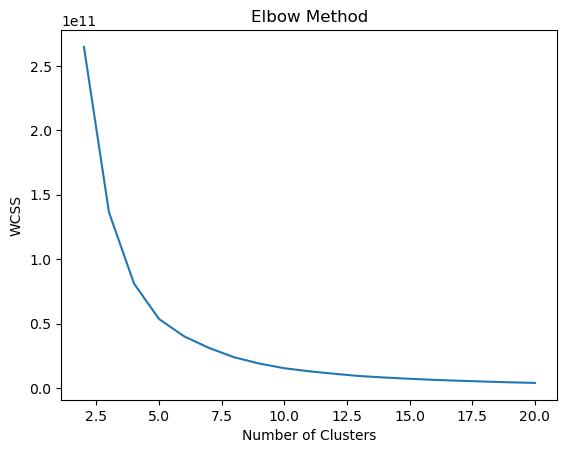

In [93]:
plt.plot(range(2,21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Taking 5 as the value would be ideal i guess since the graph after 6 is decreasing at a slower rate.

Model Training

In [94]:
k_means=KMeans(n_clusters=5, random_state=42)
y_means=k_means.fit_predict(X)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [108]:
df['Cluster']=y_means

Text(0, 0.5, 'Relationship')

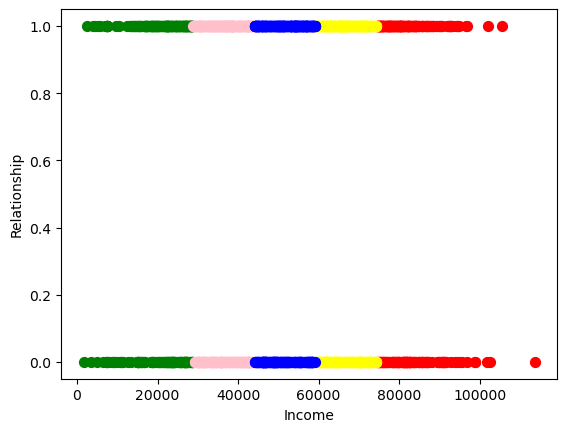

In [109]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,2], s=50, c='Red', label='Cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,2], s=50, c='Green', label='Cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,2], s=50, c='Yellow', label='Cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,2], s=50, c='Pink', label='Cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,2], s=50, c='Blue', label='Cluster 5')
plt.xlabel('Income')
plt.ylabel('Relationship')

Income of the Cluster 5 is said to be the highest in all the clusters.

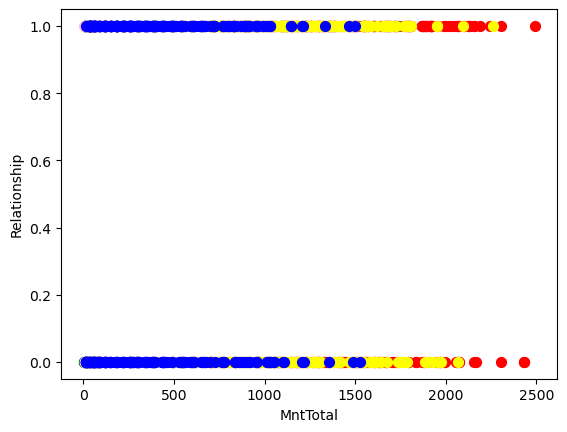

In [97]:
plt.scatter(X.iloc[y_means==0,1],X.iloc[y_means==0,2], s=50, c='Red', label='Cluster 1')
plt.scatter(X.iloc[y_means==1,1],X.iloc[y_means==1,2], s=50, c='Green', label='Cluster 2')
plt.scatter(X.iloc[y_means==2,1],X.iloc[y_means==2,2], s=50, c='Yellow', label='Cluster 3')
plt.scatter(X.iloc[y_means==3,1],X.iloc[y_means==3,2], s=50, c='Pink', label='Cluster 4')
plt.scatter(X.iloc[y_means==4,1],X.iloc[y_means==4,2], s=50, c='Blue', label='Cluster 5')
plt.xlabel('MntTotal')
plt.ylabel('Relationship')
plt.show()

From this we can see that the cluster five is dominating in the MntTotal Section

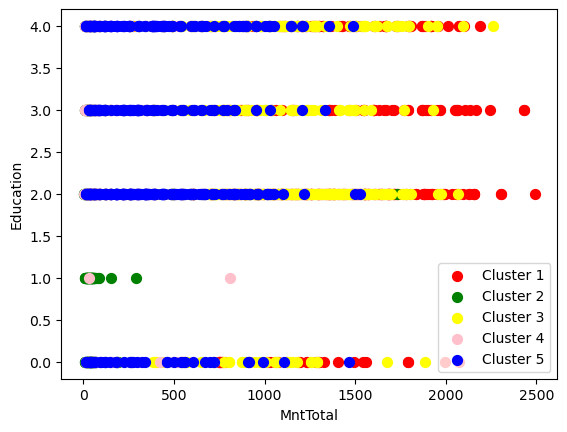

In [99]:
plt.scatter(X.iloc[y_means==0,1],X.iloc[y_means==0,3], s=50, c='Red', label='Cluster 1')
plt.scatter(X.iloc[y_means==1,1],X.iloc[y_means==1,3], s=50, c='Green', label='Cluster 2')
plt.scatter(X.iloc[y_means==2,1],X.iloc[y_means==2,3], s=50, c='Yellow', label='Cluster 3')
plt.scatter(X.iloc[y_means==3,1],X.iloc[y_means==3,3], s=50, c='Pink', label='Cluster 4')
plt.scatter(X.iloc[y_means==4,1],X.iloc[y_means==4,3], s=50, c='Blue', label='Cluster 5')
plt.xlabel('MntTotal')
plt.ylabel('Education')
plt.legend()
plt.show()

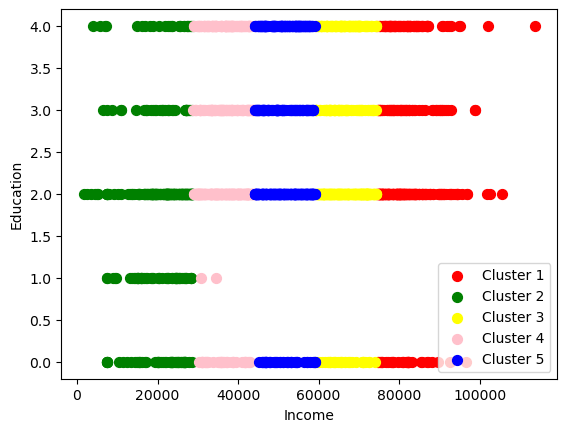

In [100]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,3], s=50, c='Red', label='Cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,3], s=50, c='Green', label='Cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,3], s=50, c='Yellow', label='Cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,3], s=50, c='Pink', label='Cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,3], s=50, c='Blue', label='Cluster 5')
plt.xlabel('Income')
plt.ylabel('Education')
plt.legend()
plt.show()

In [102]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'Marital Status', 'Education_Status', 'Relationship', 'Education'],
      dtype='object')

In [115]:
Mntotal=df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Cluster', 'MntTotal', 'MntRegularProds']]

<Axes: xlabel='Cluster'>

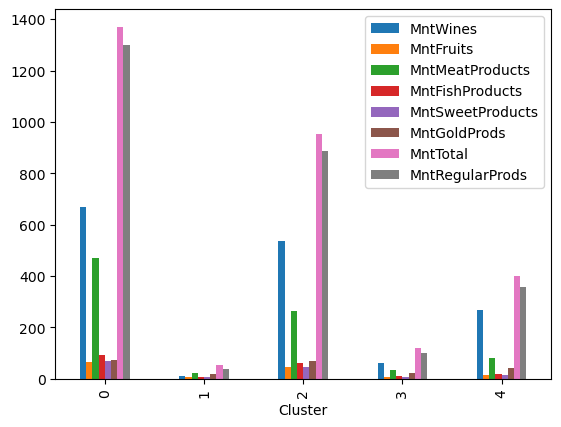

In [116]:
Mntotal.groupby('Cluster').mean().plot(kind='bar')

C:\Users\hp\AppData\Local\Temp\ipykernel_1184\1288304576.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=df, x='Cluster', y='Income', ci=None)


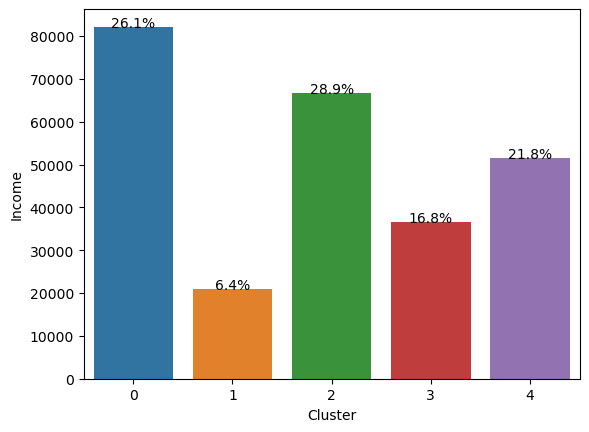

In [134]:
ax=sns.barplot(data=df, x='Cluster', y='Income', ci=None)
for i, count in enumerate(cluster_income_percentage):
    ax.text(i,ax.patches[i].get_height() + 0.8, f"{count:.1f}%", ha='center', )

In [127]:
total_income=df['Income'].sum()
cluster_income=df.groupby('Cluster')['Income'].sum()
cluster_income_percentage=(cluster_income / total_income) * 100

In [128]:
cluster_income_percentage

Cluster
0    26.131522
1     6.385499
2    28.916531
3    16.775866
4    21.790582
Name: Income, dtype: float64

In [137]:
total_money=df['MntTotal'].sum()
cluster_money_spent=df.groupby('Cluster')['MntTotal'].sum()
cluster_money_percent=(cluster_money_spent/total_money)*100

C:\Users\hp\AppData\Local\Temp\ipykernel_1184\3584883181.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=df, x='Cluster', y='MntTotal', ci=None)


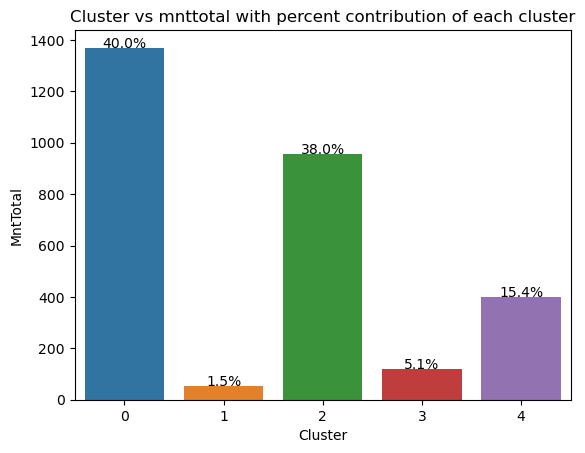

In [139]:
ax=sns.barplot(data=df, x='Cluster', y='MntTotal', ci=None)
for i, count in enumerate(cluster_money_percent):
    ax.text(i, ax.patches[i].get_height()+0.8, f"{count:.1f}%", ha='center')
plt.title('Cluster vs mnttotal with percent contribution of each cluster')
plt.show()

In [143]:
total_pro=df['MntRegularProds'].sum()
cluster_total_pro=df.groupby('Cluster')['MntRegularProds'].sum()
percent_contri=(cluster_total_pro/total_pro) * 100

C:\Users\hp\AppData\Local\Temp\ipykernel_1184\1900613802.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=df, x='Cluster', y='MntRegularProds', ci=None)


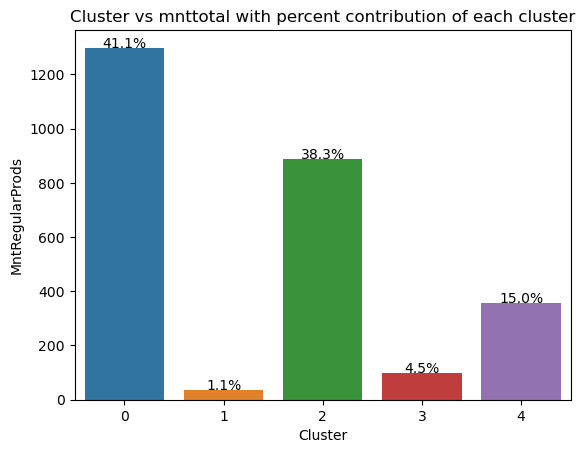

In [144]:
ax=sns.barplot(data=df, x='Cluster', y='MntRegularProds', ci=None)
for i, count in enumerate(percent_contri):
    ax.text(i, ax.patches[i].get_height()+0.8, f"{count:.1f}%", ha='center')
plt.title('Cluster vs mnttotal with percent contribution of each cluster')
plt.show()

In [148]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital Status,Education_Status,Relationship,Education,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1529,1441,0,Single,Graduated,0,2,4
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,21,15,0,Single,Graduated,0,2,4
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,734,692,0,Together,Graduated,1,2,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,48,43,0,Together,Graduated,1,2,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,407,392,0,Married,PhD Scholars,1,4,4


In [161]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital Status,Education_Status,Relationship,Education,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1529,1441,0,Single,Graduated,0,2,4
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,21,15,0,Single,Graduated,0,2,4
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,734,692,0,Together,Graduated,1,2,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,48,43,0,Together,Graduated,1,2,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,407,392,0,Married,PhD Scholars,1,4,4


In [168]:
MARI_status = df.groupby('Cluster')['Relationship'].value_counts().unstack()
MARI_status

Relationship,0,1
Cluster,,
0,131,231
1,117,230
2,177,317
3,188,333
4,170,311


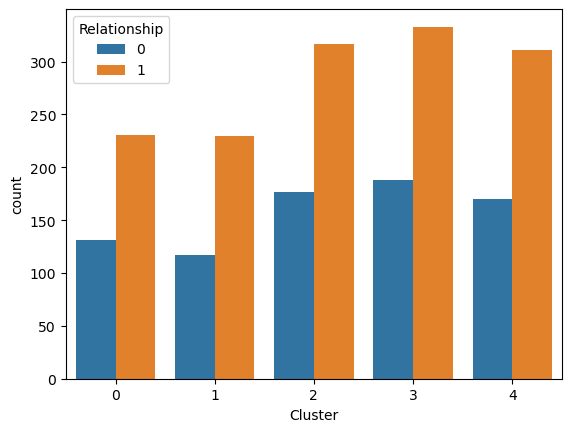

In [165]:
ax=sns.countplot(data=df, x='Cluster',hue='Relationship' )

In [169]:
EDUC_status = df.groupby('Cluster')['Education'].value_counts().unstack()
EDUC_status

Education,0,1,2,3,4
Cluster,,,,,
0,32.0,NaN,189.0,61.0,80.0
1,52.0,52.0,180.0,36.0,27.0
2,34.0,NaN,260.0,78.0,122.0
3,40.0,2.0,262.0,99.0,118.0
4,40.0,NaN,222.0,90.0,129.0


<Axes: xlabel='Cluster', ylabel='count'>

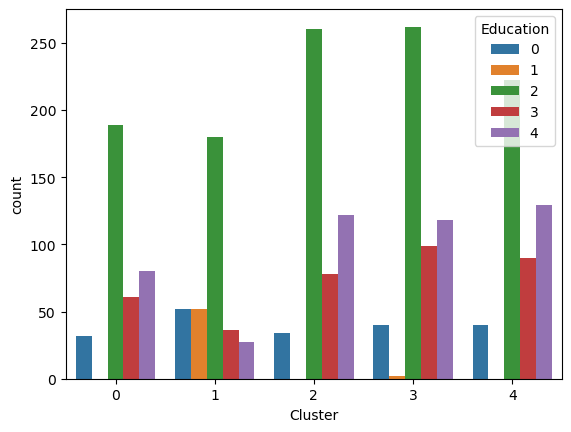

In [167]:
sns.countplot(data=df, x='Cluster', hue='Education')

In [170]:
cluster_counts = df['Cluster'].value_counts(normalize=True) * 100
cluster_counts

Cluster
3    23.628118
2    22.403628
4    21.814059
0    16.417234
1    15.736961
Name: proportion, dtype: float64

### Insights and Recommendations

**Cluster 1:**
- Accounts for **16.4** Percent of the Total Population. 
- **40** percent of the total money is spent to by them on buying the products.
- **41.1** percent of the total regular products are acquired by the cluster 1 people
- Most of the people are **Graduated**.
- **26.1** percent of the total income is of these people.
- Money most spent on the Wines.
- People here are mostly aged (around 55-60)

**Cluster 2:**
- Accounts for **15.73** Percent of the Total Population. 
- Only **1.5** percent of the total money is spent by them on buying the products.
- **1.1** percent of the total regular products are acquired by the cluster 2 people.
- Most of the people are **Graduated** and very less are **PhD Scholars**.
- **6.4** percent of the total income is of these people
- Money most spent on Gold Products and Meat.
- People here are aged around 30-41

**Cluster 3:**
- Accounts for **22.4** Percent of the Total Population. 
- **38.0** percent of the total money is spent to by them on buying the products.
- **38.3** percent of the total regular products are acquired by the cluster 2 people
- Most of the people are **Graduated** and the largest number of graduates belong to this cluster only.
- **28.9** percent of the total income is of these people.
- Money most spent on the Wines and meat.
- People here are mostly aged around 60-61

**Cluster 4:**
- Accounts for **23.6** Percent of the Total Population. 
- **5.1** percent of the total money is spent to by them on buying the products.
- **4.5** percent of the total regular products are acquired by the cluster 1 people
- Most of the people are **Graduated**.
- **16.8** percent of the total income is of these people.
- Money most spent on the Wines.

**Cluster 5:**
- Accounts for **21.81** Percent of the Total Population. 
- **15.4** percent of the total money is spent to by them on buying the products.
- **15.0** percent of the total regular products are acquired by the cluster 1 people
- Most of the people are **Graduated**.
- **21.8** percent of the total income is of these people.
- Money most spent on the Wines.

### -- END OF PROJECT --